# Problem Statement
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Objective
*in this project we will use various Machine Learning models to see how accurate are in detecing whether a transaction is a normal payment or a fraud

*due to the confidentiality of the data , the original feature name is not been provided , it has been kept private

*It contains only numerical input variables which are the result of a PCA transformation
 
*the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset



#  importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from plotly.subplots  import make_subplots
import plotly.graph_objects as go
import plotly

import warnings
warnings.filterwarnings("ignore")



from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,plot_roc_curve,accuracy_score,recall_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Loading the data
data=pd.read_csv("creditcard (1).csv")

In [3]:
pd.set_option('display.max_columns', None) #  display all columns of the dataframe
pd.set_option('display.max_rows', None)

In [4]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [5]:
data.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
284802 -2.606837 -4.918215  7.305334  1.914428  4.356170 -1.593105  2.711941   
284803  1.058415  0.024330  0.294869  0.584800 -0.975926 -0.150189  0.915802   
284804  3.031260 -0.296827  0.708417  0.432454 -0.484782  0.411614  0.063119   
284805  0.623708 -0.686180  0.679145  0.392087 -0.399126 -1.933849 -0.962886   
284806 -0.649617  1.577006 -0.414650  0.486180 -0.915427 -1.040458 -0.031513   

             V13       V14       V15       V16       V17       V18       V19  \
284802 -0.689256  4.626942 -0.924459  1.107641  1.991691  0.510632 -0.682920   
284803  1.214756 -0.675143  1.164931 -0.711757 -0.025693 -1.221179 -1.545556   
284804 -0.183699 -0.510602  1.329284  0.140716  0.313502  0.395652 -0.577252   
284805 -1.042082  0.449624  1.962563 -0.608577  0.509928  1.113981  2.897849   
284806 -0.188093 -0.084316  0.041333 -0.302620 -0.660377  0.167430 -0.256117   

             V20       V21       V22       V23       V24       V25       V26  \
284802  1.475829  0.213454  0.111864  1.014480 -0.509348  1.436807  0.250034   
284803  0.059616  0.214205  0.924384  0.012463 -1.016226 -0.606624 -0.395255   
284804  0.001396  0.232045  0.578229 -0.037501  0.640134  0.265745 -0.087371   
284805  0.127434  0.265245  0.800049 -0.163298  0.123205 -0.569159  0.546668   
284806  0.382948  0.261057  0.643078  0.376777  0.008797 -0.473649 -0.818267   

             V27       V28  Amount  class  
284802  0.943651  0.823731    0.77      0  
284803  0.068472 -0.053527   24.79      0  
284804  0.004455 -0.026561   67.88      0  
284805  0.108821  0.104533   10.00      0  
284806 -0.002415  0.013649  217.00      0

In [6]:
data.shape

(284807, 31)

In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')

In [8]:
# createing the copy of the data 

In [9]:
df=data.copy()

In [10]:
df.shape

(284807, 31)

# let check for the duplicates values

In [11]:
# find duplicate rows
duplicate_rows = df.duplicated()

# filter the DataFrame to select only the duplicate rows
duplicate_values = df[duplicate_rows]

# print the duplicate values
duplicate_values

Time         V1         V2         V3         V4         V5  \
33          26.0  -0.529912   0.873892   1.347247   0.145457   0.414209   
35          26.0  -0.535388   0.865268   1.351076   0.147575   0.433680   
113         74.0   1.038370   0.127486   0.184456   1.109950   0.441699   
114         74.0   1.038370   0.127486   0.184456   1.109950   0.441699   
115         74.0   1.038370   0.127486   0.184456   1.109950   0.441699   
221        145.0  -2.420413   1.947885   0.553646   0.983069  -0.281518   
223        145.0  -2.419486   1.949346   0.552998   0.982710  -0.284815   
1178       919.0   0.904289  -0.538055   0.396058   0.500680  -0.864473   
1180       919.0   1.207596  -0.036860   0.572104   0.373148  -0.709633   
1382      1074.0  -2.248488  -0.195670   0.026949  -0.525780  -0.238759   
1384      1074.0  -2.445204  -0.505494   0.164511  -0.449658   0.460784   
1684      1308.0  -1.322313   0.863591   1.844234   1.089375   0.771005   
1686      1308.0  -1.379848   0.536720   2.647870   1.408111   0.126442   
2004      1548.0  -1.559446   1.425546   0.812589  -1.129381   0.507528   
2005      1548.0  -1.559446   1.425546   0.812589  -1.129381   0.507528   
2006      1548.0  -1.559446   1.425546   0.812589  -1.129381   0.507528   
2728      2270.0  -2.171193   1.521296   0.698043   1.480960  -1.096511   
2729      2270.0  -2.171193   1.521296   0.698043   1.480960  -1.096511   
2731      2270.0  -2.181204   1.505528   0.705044   1.484834  -1.060910   
2732      2270.0  -2.181204   1.505528   0.705044   1.484834  -1.060910   
2734      2270.0  -2.187707   1.495286   0.709591   1.487350  -1.037785   
2735      2270.0  -2.187707   1.495286   0.709591   1.487350  -1.037785   
2784      2323.0  -2.106211   0.577057   1.717694   1.444458  -0.291290   
2786      2323.0  -2.126258   0.545482   1.731713   1.452215  -0.219999   
2998      2550.0  -1.055610   0.012962   2.178270   1.351661   1.462775   
3000      2550.0  -1.051814   0.018941   2.175615   1.350192   1.449274   
3175      2749.0  -0.654613   0.969360   1.689934   1.055019  -0.491793   
3177      2749.0  -0.624780   1.016347   1.669072   1.043474  -0.597883   
3316      2866.0   1.020962  -0.130374   0.550700   0.704957   0.080658   
3318      2866.0   1.010472  -0.147709   0.544611   0.709368   0.075302   
3321      2868.0  -2.836574   2.200151  -0.094571   0.026859  -0.888280   
3323      2868.0  -2.848828   2.180851  -0.086002   0.031601  -0.844703   
4900      4433.0   1.051080  -0.096653   1.484961   2.011514  -0.850953   
4902      4433.0   1.036610  -0.120564   1.476562   2.017598  -0.858340   
5925      6536.0   1.256892   0.081798  -1.025909   0.472521   2.256109   
5927      6536.0   1.260485   0.087736  -1.023824   0.471010   2.257944   
6411      7602.0  -4.516626   4.366391  -0.282225   0.641568  -0.694287   
6412      7602.0  -4.516626   4.366391  -0.282225   0.641568  -0.694287   
6413      7602.0  -4.516626   4.366391  -0.282225   0.641568  -0.694287   
9027     12587.0  -5.708411   4.794625  -1.155486   0.421606  -0.588195   
9028     12587.0  -5.708411   4.794625  -1.155486   0.421606  -0.588195   
9029     12587.0  -5.708411   4.794625  -1.155486   0.421606  -0.588195   
11132    19266.0   1.091437  -0.227000   1.012208   1.632910  -0.300770   
11134    19266.0   1.101116  -0.211007   1.017825   1.628840  -0.295829   
12393    21723.0   1.139028   0.765946   1.084775   2.816572  -0.316182   
12394    21723.0   1.139028   0.765946   1.084775   2.816572  -0.316182   
12395    21723.0   1.139028   0.765946   1.084775   2.816572  -0.316182   
13563    24050.0   0.783460  -0.766538   1.331255   1.812482  -0.929991   
13564    24050.0   0.783460  -0.766538   1.331255   1.812482  -0.929991   
13565    24050.0   0.783460  -0.766538   1.331255   1.812482  -0.929991   
13882    24646.0   1.100828   0.115819   1.539031   1.643405  -0.753781   
13883    24646.0   1.100828   0.115819   1.539031   1.643405  -0.753781   
13884    24646.0   1.100828   0.11581

In [12]:
duplicate_values.shape

(1081, 31)

In [13]:
# drop duplicate rows
df = df.drop_duplicates()

In [14]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 


In [15]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [16]:
from pandas_profiling import ProfileReport

In [17]:
profile = ProfileReport(df,title ="Credit card Dataset", minimal=True)
#profile.to_file(output_file="output_min.html")

In [18]:
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/41 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### No null values are avaible in data set 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [20]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [21]:
df.describe()

Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.689830      -0.769031      -0.552509   
50%        -0.022248      -0.053468      -0.275168       0.040859   
75%         0.739647       0.612218       0.396792       0.570474   
max        16.875344      34.801666      73.301626     120.589494   

                  V8             V9            V10            V11  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.000854      -0.001596      -0.001441       0.000202   
std         1.179054       1.095492       1.076407       1.018720   
min       -73.216718     -13.434066     -24.588262      -4.797473   
25%        -0.208828      -0.644221      -0.535578      -0.761649   
50%         0.021898      -0.052596      -0.093237      -0.032306   
75%         0.325704       0.595977       0.453619       0.739579   
max        20.007208      15.594995      23.745136      12.018913   

                 V12            V13            V14            V15  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.000715       0.000603       0.000252       0.001043   
std         0.994674       0.995430       0.952215       0.914894   
min       -18.683715      -5.791881     -19.214325      -4.498945   
25%        -0.406198      -0.647862      -0.425732      -0.581452   
50%         0.139072      -0.012927       0.050209       0.049299   
75%         0.616976       0.663178       0.492336       0.650104   
max         7.848392       7.126883      10.526766       8.877742   

                 V16            V17            V18            V19  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.001162       0.000170       0.001515      -0.000264   
std         0.873696       0.842507       0.837378       0.813379   
min       -14.129855     -25.162799      -9.498746      -7.213527   
25%        -0.466860      -0.483928      -0.498014      -0.456289   
50%         0.067119      -0.065867      -0.002142       0.003367   
75%         0.523512       0.398972       0.501956       0.458508   
max        17.315112       9.253526       5.041069       5.591971   

                 V20            V21            V22            V23  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.000187      -0.000371      -0.000015       0.000198   
std         0.769984       0.723909       0.724550       0.623702   
min       -54.497720     -34.830382     -10.933144     -44.807735   
25%        -0.211469      -0.228305      -0.542700      -0.161703   
50%        -0.062353      -0.029441       0.006675      -0.011159   
75%         0.133207       0.186194       0.528245       0.147748   
max        39.420904      27.202839      10.503090      22.528412   

                 V24            V25            V26            V27  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.000214      -0.000232       0.000149       0.001763   
std         0.605627       0.521220       0.482053       0.395744   
min     

In [22]:
df.nunique()

Time      124592
V1        275653
V2        275655
V3        275657
V4        275654
V5        275657
V6        275652
V7        275651
V8        275643
V9        275656
V10       275646
V11       275648
V12       275654
V13       275657
V14       275653
V15       275653
V16       275645
V17       275646
V18       275655
V19       275645
V20       275632
V21       275617
V22       275644
V23       275611
V24       275645
V25       275640
V26       275647
V27       275597
V28       275558
Amount     32767
class          2
dtype: int64

<AxesSubplot:title={'center':'count Plot - Class'}, xlabel='class', ylabel='count'>

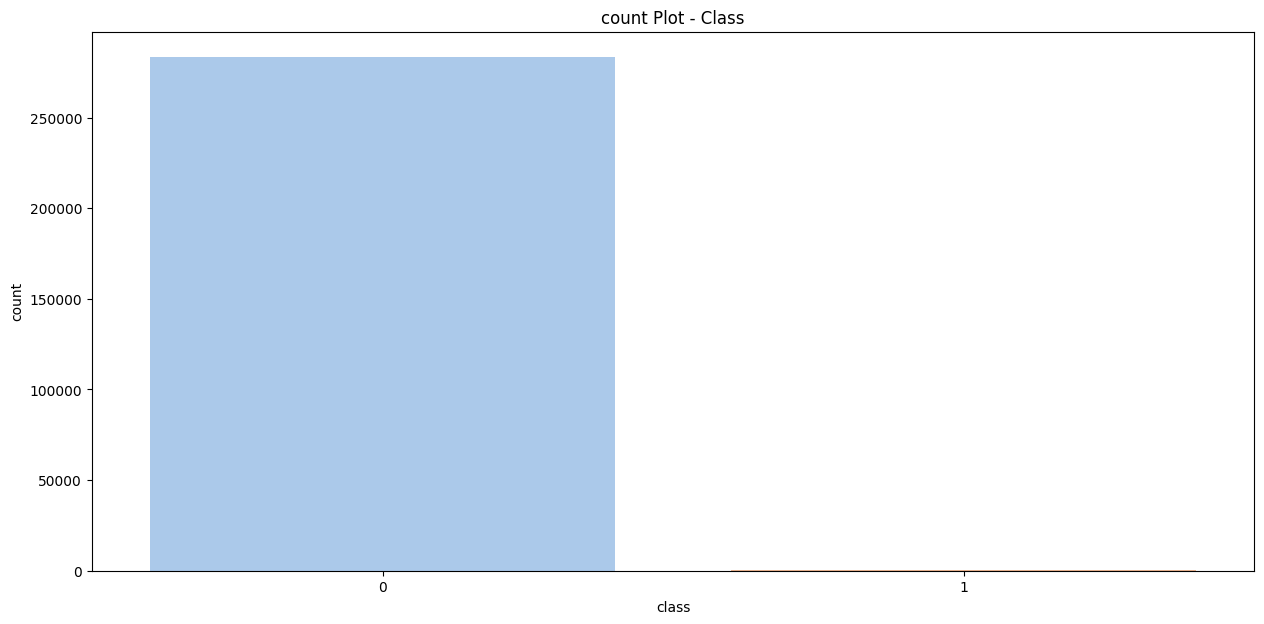

In [23]:
plt.figure(figsize=[15,7])
plt.title("count Plot - Class")
sns.countplot(x= "class",data = df,palette = "pastel")

the data is highly  unbalanced 


In [24]:
lis=["Not Fraud","Frauds"]
no_fraud = df["class"].value_counts().tolist()
values = [no_fraud[0],no_fraud[1]]
fig = px.pie(values=df["class"].value_counts(),names=lis, width=800, height = 400 , color_discrete_sequence=["skyblue","red"],
             title="percentage between Frauds and genuine transactions")
fig.show()

 We can Notice that  how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud.

# correalation 

<AxesSubplot:>

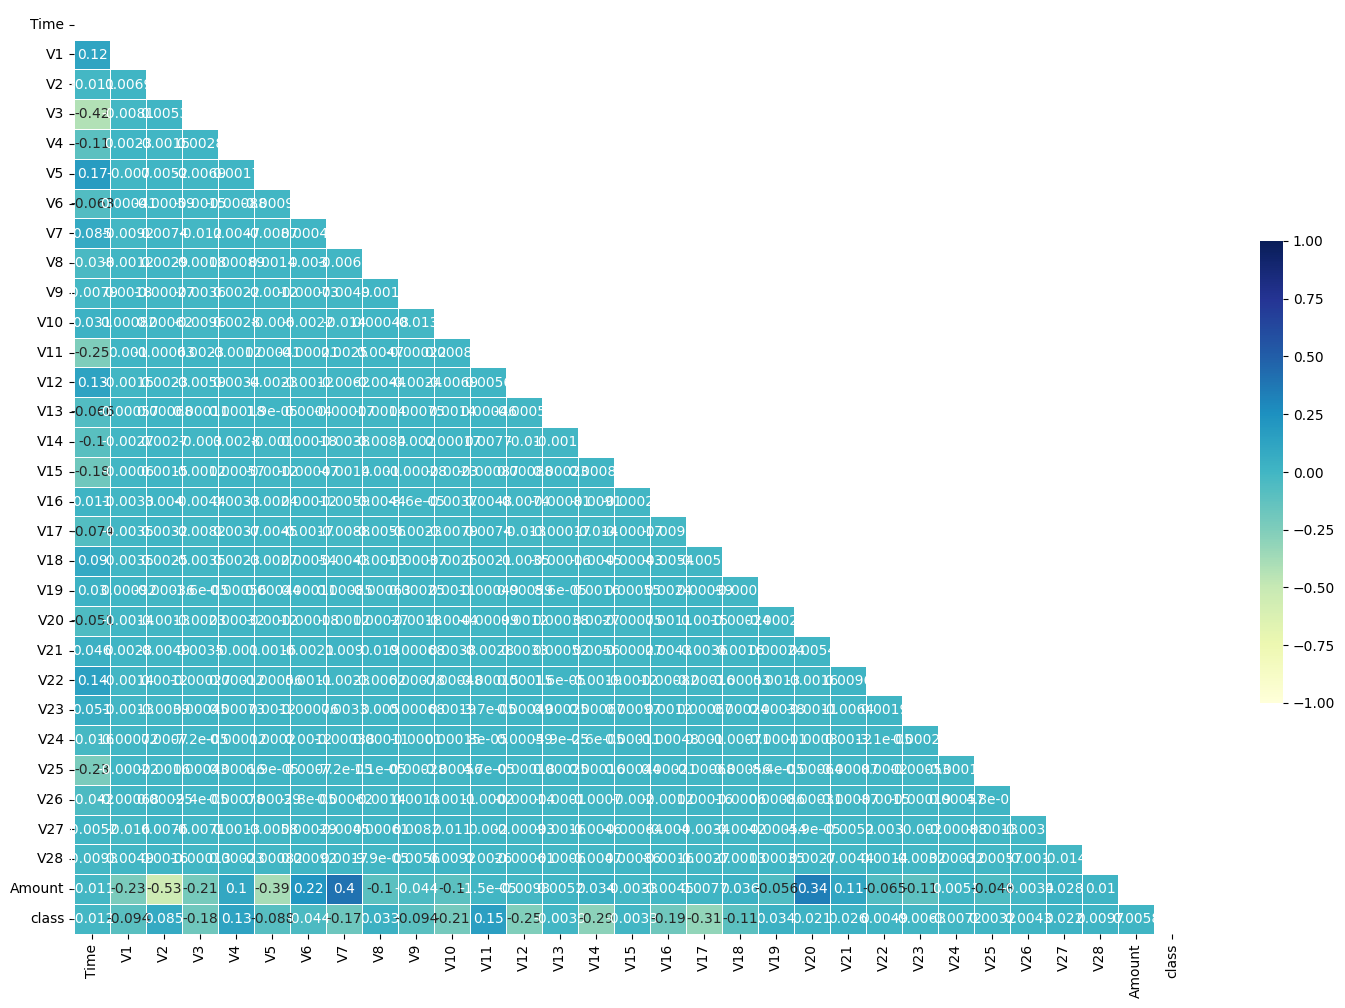

In [25]:
corr = df.corr()
mask = np.zeros_like(corr, dtype = np.bool) #  it returns  an  array of a given shape with type as an array with zeros 
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(18,12))
# Draw  the heatmap with the mask and correct aspect  ratio 
sns.heatmap(corr,mask=mask,cmap="YlGnBu",vmax=1,vmin=-1,center=0,linewidth=.5,cbar_kws={"shrink": .5}, annot=True)




# Studing Correalation 

by looking at graph there is  no positive correalation  or negavitue coreealation between the varibale

Kernel density estimation is a non-parametric way to estimate the probability density function of a random variable.
It is often used in machine learning to estimate the underlying distribution of a dataset, especially when the dataset is large and the underlying distribution is not know

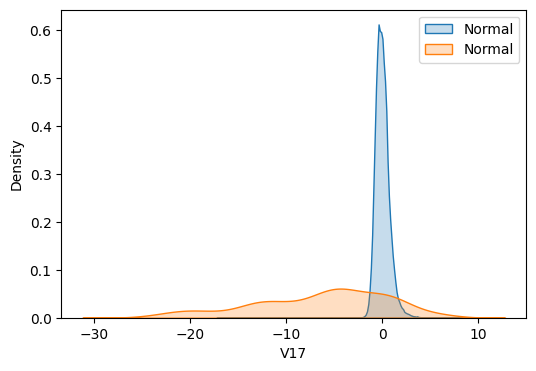

In [26]:
plt.figure(figsize=(6,4))
sns.kdeplot(data= df[df["class"]==0]["V17"],label="Normal",shade=True)
sns.kdeplot(data = df[df["class"]==1]["V17"],label="Normal",shade = True)
plt.legend()
plt.show()

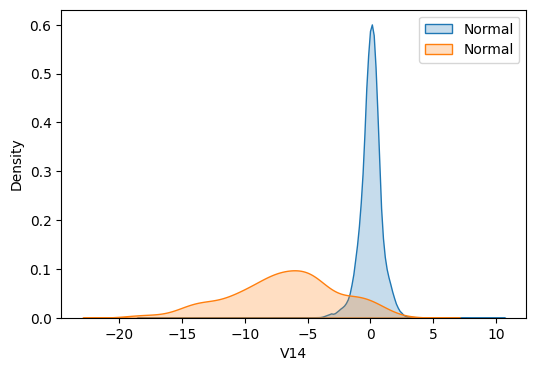

In [27]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df[df["class"]==0]["V14"], label="Normal",shade=True)
sns.kdeplot(data = df[df["class"]==1]["V14"], label = "Normal", shade = True)
plt.legend()
plt.show()

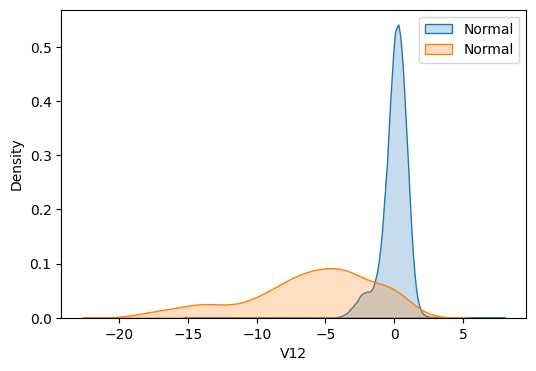

In [28]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df[df["class"]==0]["V12"], label="Normal",shade=True)
sns.kdeplot(data = df[df["class"]==1]["V12"], label = "Normal", shade = True)
plt.legend()
plt.show()

# Univariate analysis

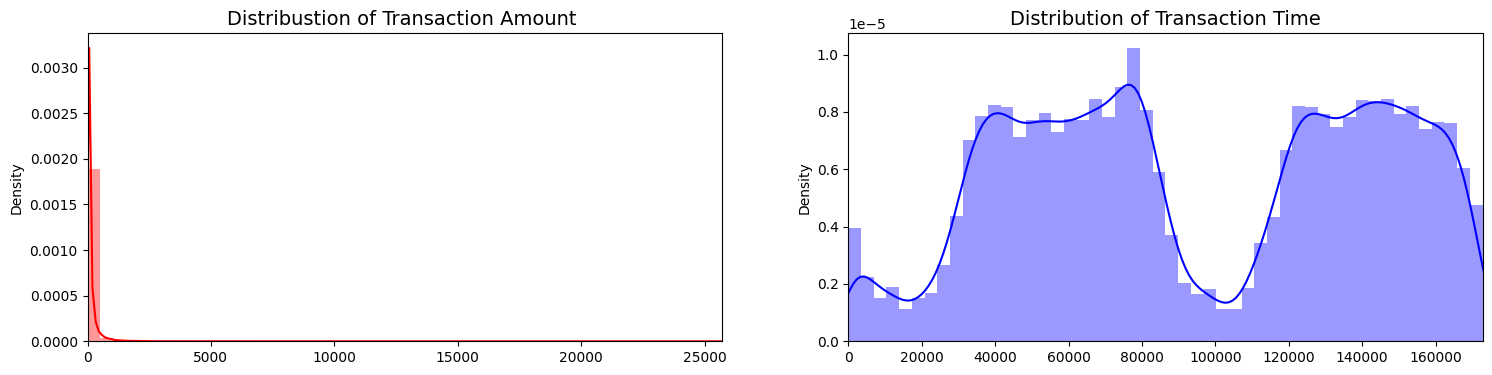

In [29]:
fig, ax =  plt.subplots(1, 2, figsize = (18, 4))

val_Amount = df["Amount"].values
Val_Time = df["Time"].values

sns.distplot(val_Amount, ax=ax[0], color = "r")
ax[0].set_title("Distribustion of Transaction Amount ", fontsize = 14)
ax[0].set_xlim([min(val_Amount),max(val_Amount)])

sns.distplot(Val_Time, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(Val_Time), max(Val_Time)])

plt.show()

In [30]:
#assign a variable for class
genuine = df[df["class"]==0]
fraud= df[df["class"]==1]


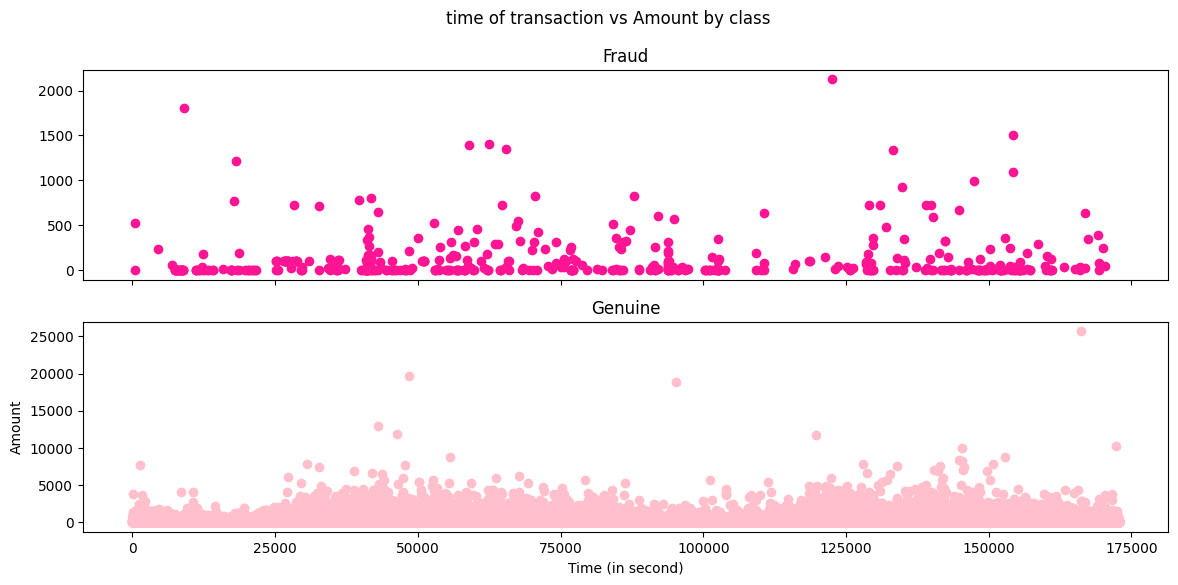

In [31]:
from pylab import rcParams
rcParams["figure.figsize"]=14,6
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle("time of transaction vs Amount by class")
ax1.scatter(fraud.Time, fraud.Amount,color = "deeppink")
ax1.set_title("Fraud")
ax2.scatter(genuine.Time, genuine.Amount, color = "pink")
ax2.set_title("Genuine")
plt.xlabel("Time (in second)")
plt.ylabel("Amount")
plt.show()

#Bivariate Analysis

Text(0.5, 1.0, 'Transaction Times for genuine users ')

<Figure size 800x400 with 0 Axes>

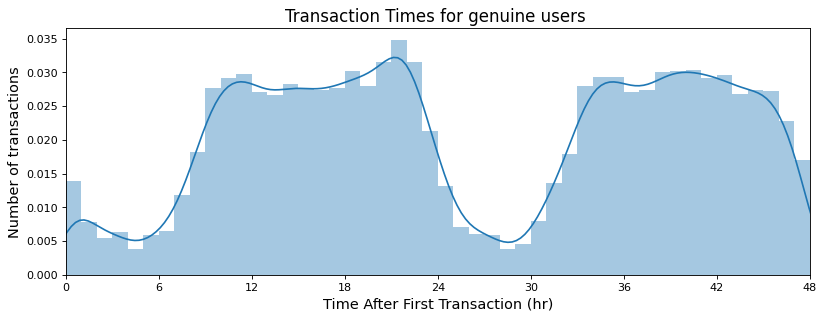

In [32]:
plt.figure(figsize=(8,4))
Nofraud_data = df [df['class']==0]
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(Nofraud_data ['Time']/3600, bins=48)
plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel('Time After First Transaction (hr)',fontsize=13)
plt.ylabel('Number of transactions',fontsize=13)
plt.title('Transaction Times for genuine users ',fontsize=15)

Text(0.5, 1.0, 'Transaction Times for genuine users ')

<Figure size 800x400 with 0 Axes>

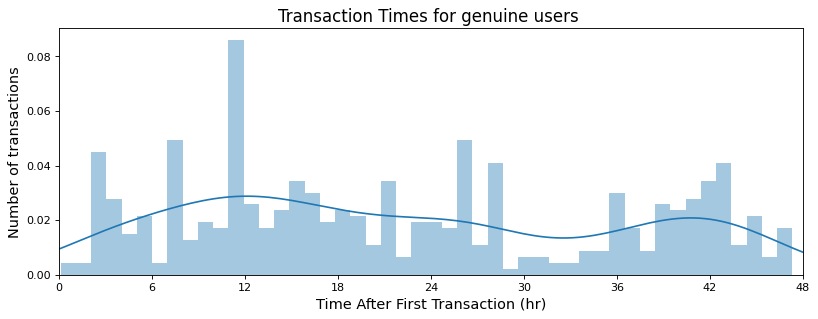

In [33]:
plt.figure(figsize=(8,4))
Nofraud_data = df [df['class']==1]
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(Nofraud_data ['Time']/3600, bins=48)
plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel('Time After First Transaction (hr)',fontsize=13)
plt.ylabel('Number of transactions',fontsize=13)
plt.title('Transaction Times for genuine users ',fontsize=15)

# checking the Outliears 

<AxesSubplot:xlabel='Amount'>

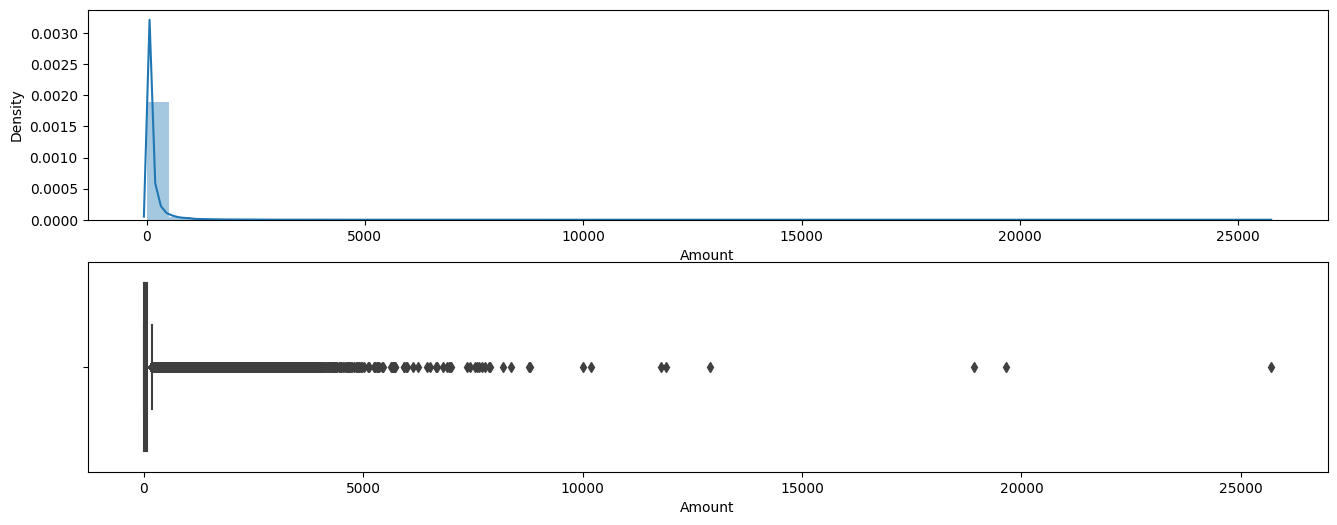

In [34]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (16,6))
sns.distplot(df.Amount, ax=ax1)
sns.boxplot(df.Amount, ax=ax2)

In [35]:
from scipy.stats import  iqr

In [36]:
upper_limit = df.Amount.quantile(0.75)+(1.5*iqr(df.Amount))
print(upper_limit)
print(df[df.Amount>upper_limit]["class"].value_counts())

185.375
0    31598
1       87
Name: class, dtype: int64


In [37]:
df = df[df.Amount<=12000]
print(df["class"].value_counts())
print("\n percentage of fraudulent activity :{:.2%}".format((df[df["class"]==1].shape[0]/data.shape[0])))

0    283249
1       473
Name: class, dtype: int64

 percentage of fraudulent activity :0.17%


In [38]:
df.shape

(283722, 31)

# Scaleing 

### Normalize the amount variable so that it can be on the same scale as other variable are ,

In [49]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df['Amount_Normalize'] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))

KeyError: 'Amount'

In [44]:
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   class  Amount_Normalize  
0      0          0.256774  
1      0         -0.357505  
2      0          1.214334  
3      0          0.147573  
4      0         -0.076140

drop the orignal Amount column and Time because we are not using those column anymore.

In [41]:
df.drop(['Amount','Time'],axis=1,inplace=True)

In [42]:
df.shape

(283722, 30)

# Creating X and Y

In [44]:
X= df.drop("class",axis=1)
Y=df["class"]

In [45]:
# lets print the shapes of these newly formed data sets
print("Shape of the x :", X.shape)
print("Shape of the y :", Y.shape)

Shape of the x : (283722, 29)
Shape of the y : (283722,)


# Resampling
It is very important to resample the data, as the Target class is Highly imbalanced.

Here We are going to use Over Sampling Technique to resample the data.

lets import the SMOTE algorithm to do the same.

In [46]:
!pip install imbalanced-learn==0.6.0

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
X_resample,Y_resample = SMOTE().fit_sample(X,Y)
# lets print the shape of x and y after resampling it
print(X_resample.shape)
print(Y_resample.shape)

(566498, 29)
(566498,)


In [49]:
print(Y_resample.value_counts())

0    283249
1    283249
Name: class, dtype: int64


In [50]:
fig = px.pie(values=Y_resample.value_counts(), width=800, height=400, title="Data Balance",color_discrete_sequence=["skyblue","black"])
fig.show()

# Before  Resampleing 

In [51]:
print("Before Resampling :")
print(Y.value_counts())

Before Resampling :
0    283249
1       473
Name: class, dtype: int64


# lets create a validation set from the training data 

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_resample,Y_resample,test_size=0.2,random_state=0)

print(f"X_train-shape:{X_train.shape}")
print(f"Y_train-shape :{Y_train.shape}")
print(f"X_test-shape:{X_test.shape}")
print(f"Y_test-shape:{Y_test.shape}")

X_train-shape:(453198, 29)
Y_train-shape :(453198,)
X_test-shape:(113300, 29)
Y_test-shape:(113300,)


# LogisticRegression 

In [53]:
from sklearn.linear_model import LogisticRegression
# create model
classifier= LogisticRegression()
# fitting training data to the model
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
#print(Y_pred)

In [54]:
classifier.score(X_train , Y_train)

0.9452424767982206

In [55]:
classifier.score(X_test , Y_test)

0.9433009708737864

In [119]:
!pip install scikit-plot


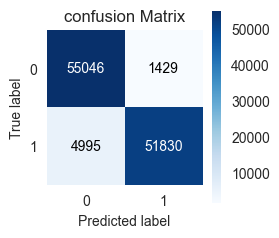

Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     56475
           1       0.97      0.91      0.94     56825

    accuracy                           0.94    113300
   macro avg       0.94      0.94      0.94    113300
weighted avg       0.95      0.94      0.94    113300

Accuracy of the model:  0.9433009708737864


In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

# using cross_validation

In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
classifier= LogisticRegression()
scores=cross_val_score(classifier,X_train,Y_train,cv=skfold)
print(scores)

[0.94524492 0.94543248 0.94440644 0.94597248 0.9449354 ]


In [58]:
print(np.mean(scores))

0.9451983471047823


### ROC Curve

In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AUC : 0.94 



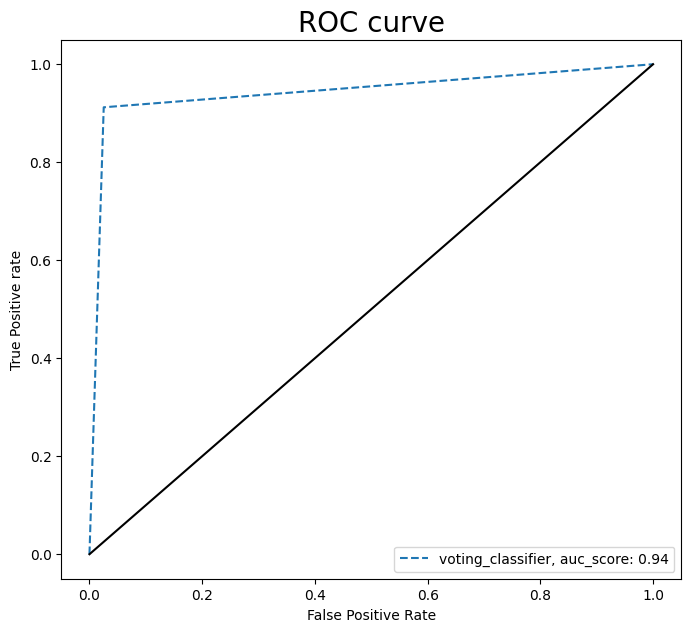

In [86]:
plt.figure(figsize = (8,7))
fpr, tpr, thresholds = roc_curve(Y_test,Y_pred)

auc_score = roc_auc_score(Y_test,Y_pred)
print('AUC : {0:0.2f}'.format(auc_score),'\n')

plt.plot(fpr,tpr,linestyle='--',label='voting_classifier, auc_score: {0:0.2f}'.format(auc_score))

plt.plot([0,1], [0,1], 'k-' )

# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.savefig('ROC',dpi=300)
plt.show();


# Desision tree  classifiers 

In [59]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

y_pred = DT.predict(X_test)

In [60]:
DT.score(X_train , Y_train)

1.0

In [61]:
DT.score(X_test , Y_test)

0.998278905560459

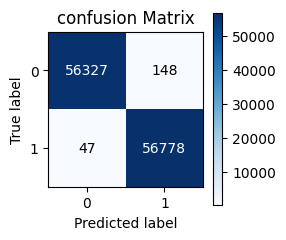

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56475
           1       1.00      1.00      1.00     56825

    accuracy                           1.00    113300
   macro avg       1.00      1.00      1.00    113300
weighted avg       1.00      1.00      1.00    113300

Accuracy of the model:  0.998278905560459


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred))

acc=accuracy_score(Y_test, y_pred)
print("Accuracy of the model: ",acc)

### ROC

AUC : 1.00 



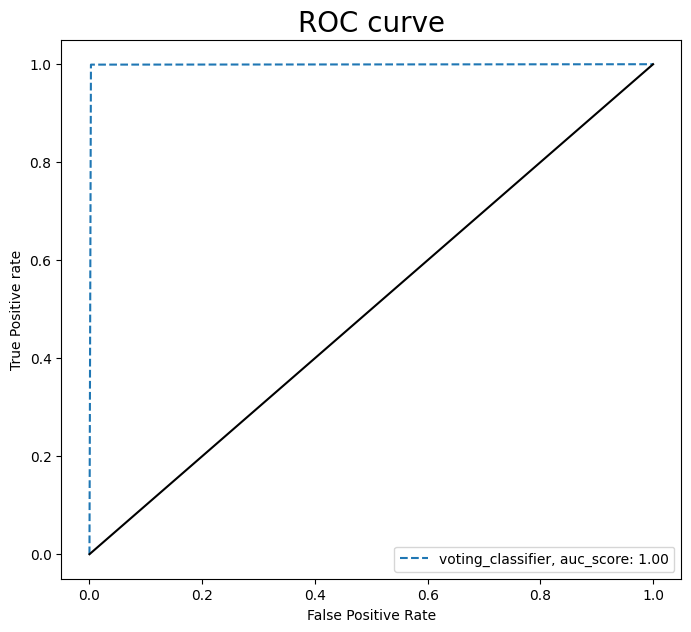

In [88]:
plt.figure(figsize = (8,7))
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)

auc_score = roc_auc_score(Y_test,y_pred)
print('AUC : {0:0.2f}'.format(auc_score),'\n')

plt.plot(fpr,tpr,linestyle='--',label='voting_classifier, auc_score: {0:0.2f}'.format(auc_score))

plt.plot([0,1], [0,1], 'k-' )

# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.savefig('ROC',dpi=300)
plt.show();


# Random Forest 

In [63]:
from  sklearn.ensemble import  RandomForestClassifier
RT= RandomForestClassifier()
RT.fit(X_train,Y_train)
Y_pred1=RT.predict(X_test)

In [64]:
RT.score(X_train , Y_train)

1.0

In [65]:
RT.score(X_test , Y_test)

0.9998587819947043

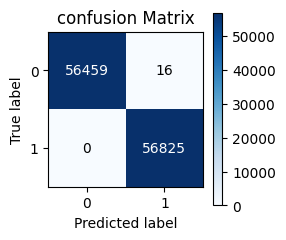

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56475
           1       1.00      1.00      1.00     56825

    accuracy                           1.00    113300
   macro avg       1.00      1.00      1.00    113300
weighted avg       1.00      1.00      1.00    113300

Accuracy of the model:  0.9998587819947043


In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred1)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred1))

acc=accuracy_score(Y_test, Y_pred1)
print("Accuracy of the model: ",acc)

### ROC

AUC : 1.00 



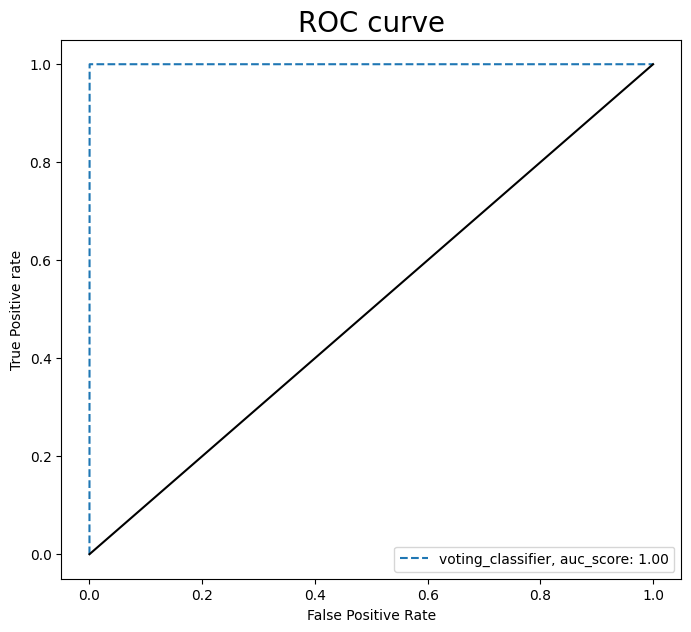

In [89]:


plt.figure(figsize = (8,7))
fpr, tpr, thresholds = roc_curve(Y_test,Y_pred1)

auc_score = roc_auc_score(Y_test,Y_pred1)
print('AUC : {0:0.2f}'.format(auc_score),'\n')

plt.plot(fpr,tpr,linestyle='--',label='voting_classifier, auc_score: {0:0.2f}'.format(auc_score))

plt.plot([0,1], [0,1], 'k-' )

# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.savefig('ROC',dpi=300)
plt.show();


# XGB BOOST

In [67]:
# XGB Boost

from xgboost import XGBClassifier

XGB=XGBClassifier(n_estimators=100,random_state=10)
#fit the model on the data and predict the values
XGB.fit(X_train,Y_train)
Y_pred2=XGB.predict(X_test)

In [68]:
XGB.score(X_train , Y_train)

0.9999669018839448

In [69]:
XGB.score(X_test , Y_test)

0.9996999117387467

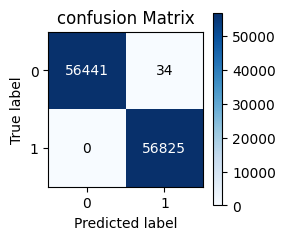

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56475
           1       1.00      1.00      1.00     56825

    accuracy                           1.00    113300
   macro avg       1.00      1.00      1.00    113300
weighted avg       1.00      1.00      1.00    113300

Accuracy of the model:  0.9996999117387467


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred2)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred2))

acc=accuracy_score(Y_test, Y_pred2)
print("Accuracy of the model: ",acc)

AUC : 1.00 



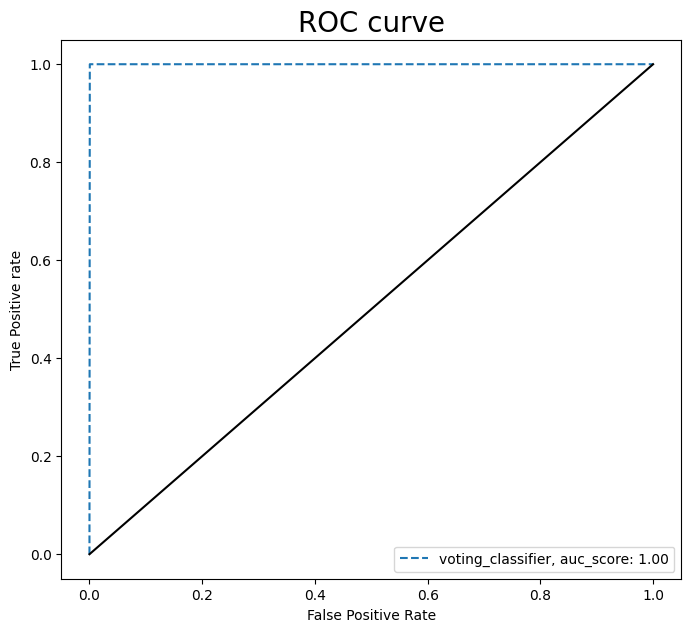

In [90]:


plt.figure(figsize = (8,7))
fpr, tpr, thresholds = roc_curve(Y_test,Y_pred2)

auc_score = roc_auc_score(Y_test,Y_pred2)
print('AUC : {0:0.2f}'.format(auc_score),'\n')

plt.plot(fpr,tpr,linestyle='--',label='voting_classifier, auc_score: {0:0.2f}'.format(auc_score))

plt.plot([0,1], [0,1], 'k-' )

# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.savefig('ROC',dpi=300)
plt.show();


# Gradient Boost Classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
#Instantiating the model with parameters
gbc = GradientBoostingClassifier(n_estimators=500,max_features=3, max_leaf_nodes= 2, random_state=1415)

#Fitting the model with X_train_ros, y_train_ros
gbc.fit(X_train, Y_train)
Y_pred3 = gbc.predict(X_test)

In [73]:
gbc.score(X_train , Y_train)

0.9610104192869342

In [74]:
gbc.score(X_test , Y_test)

0.9594174757281554

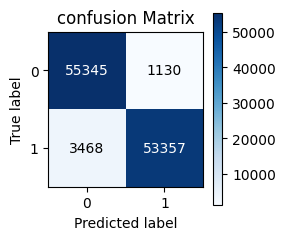

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56475
           1       0.98      0.94      0.96     56825

    accuracy                           0.96    113300
   macro avg       0.96      0.96      0.96    113300
weighted avg       0.96      0.96      0.96    113300

Accuracy of the model:  0.9594174757281554


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred3)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred3))

acc=accuracy_score(Y_test, Y_pred3)
print("Accuracy of the model: ",acc)

AUC : 0.96 



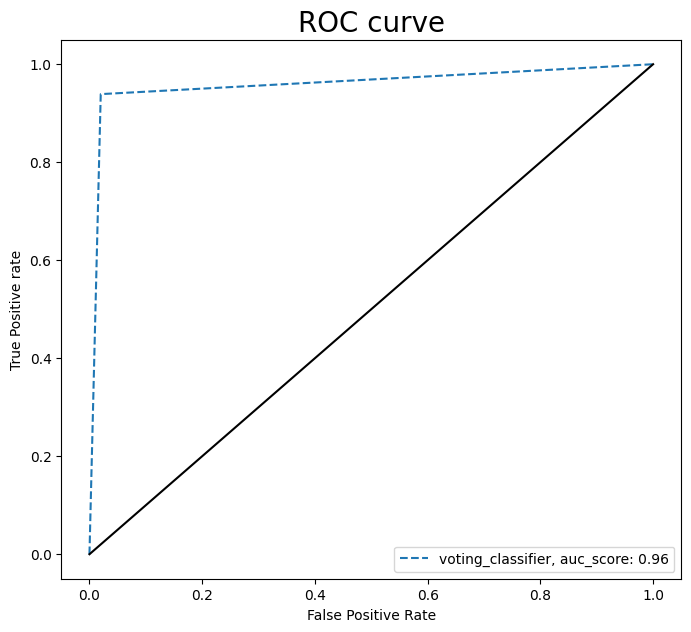

In [91]:
### ROC

plt.figure(figsize = (8,7))
fpr, tpr, thresholds = roc_curve(Y_test,Y_pred3)

auc_score = roc_auc_score(Y_test,Y_pred3)
print('AUC : {0:0.2f}'.format(auc_score),'\n')

plt.plot(fpr,tpr,linestyle='--',label='voting_classifier, auc_score: {0:0.2f}'.format(auc_score))

plt.plot([0,1], [0,1], 'k-' )

# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.savefig('ROC',dpi=300)
plt.show();


# Model Selection 

In [79]:
model_comparison={}
model_comparison['Decision Tree']=[accuracy_score(Y_test,y_pred),f1_score(Y_test,y_pred,average='weighted'),precision_score(Y_test,y_pred),recall_score(Y_test,y_pred)]
model_comparison['Random Forest']=[accuracy_score(Y_test,Y_pred1),f1_score(Y_test,Y_pred1,average='weighted'),precision_score(Y_test,Y_pred1),recall_score(Y_test,Y_pred1)] 
model_comparison['Logisticregerssion']=[accuracy_score(Y_test,Y_pred),f1_score(Y_test,Y_pred,average='weighted'),precision_score(Y_test,Y_pred),recall_score(Y_test,Y_pred)]
model_comparison['XGB Boost']=[accuracy_score(Y_test,Y_pred2),f1_score(Y_test,Y_pred2,average='weighted'),precision_score(Y_test,Y_pred2),recall_score(Y_test,Y_pred2)] 
model_comparison['Gradient Boost Classifier']=[accuracy_score(Y_test,Y_pred3),f1_score(Y_test,Y_pred3,average='weighted'),precision_score(Y_test,Y_pred3),recall_score(Y_test,Y_pred3)] 

In [80]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','precision','recall']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

In [81]:
fig = px.bar(Model_com_df['Model Accuracy']) 
fig.show()

In [95]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, Y_pred)
fpr2, tpr2, thresh2 = roc_curve(Y_test, y_pred)
fpr3, tpr3, thresh3 = roc_curve(Y_test, Y_pred1)
fpr4, tpr4, thresh4 = roc_curve(Y_test, Y_pred2)
fpr5, tpr5, thresh5 = roc_curve(Y_test, Y_pred3)


random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

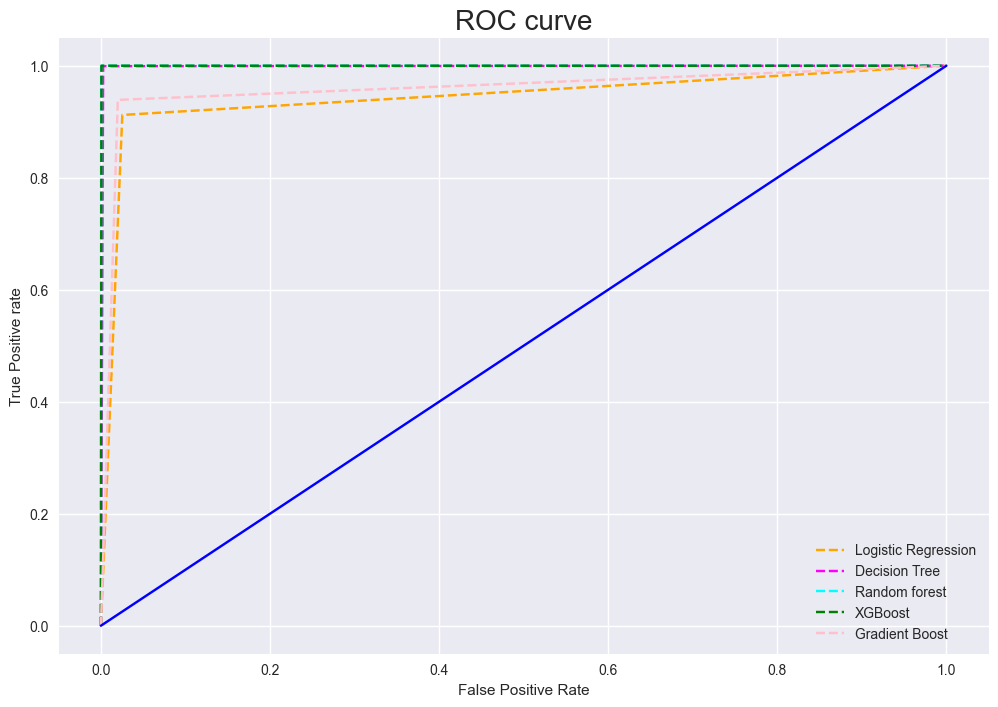

In [98]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 8))
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='magenta', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='cyan', label='Random forest')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='XGBoost')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='Gradient Boost')

plt.plot(p_fpr, p_tpr, color='blue')




# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Best model


Considering  the Model Accuracy	Model and  F1 scores of the different models, the Random forest model emerges as the best performing model followed by the XGBoost. Hence, the RANDOM forest  model is chosen as the best model.

# Feature Importance 

In [100]:
RT.feature_importances_

array([0.01122829, 0.02319547, 0.04090761, 0.10935696, 0.00804511,
       0.00687759, 0.03755442, 0.01447605, 0.0187945 , 0.13726936,
       0.06503232, 0.08689384, 0.00938192, 0.18322308, 0.00755211,
       0.05153399, 0.0890515 , 0.01337491, 0.01038885, 0.00760425,
       0.01511352, 0.00471672, 0.00671204, 0.0048369 , 0.00529621,
       0.00722999, 0.0079747 , 0.00646794, 0.00990986])

In [101]:
feature_importances = pd.DataFrame({"Features":X_train.columns,"Importance":RT.feature_importances_})

In [103]:
feature_importances = feature_importances.sort_values(by = 'Importance',ascending = False)

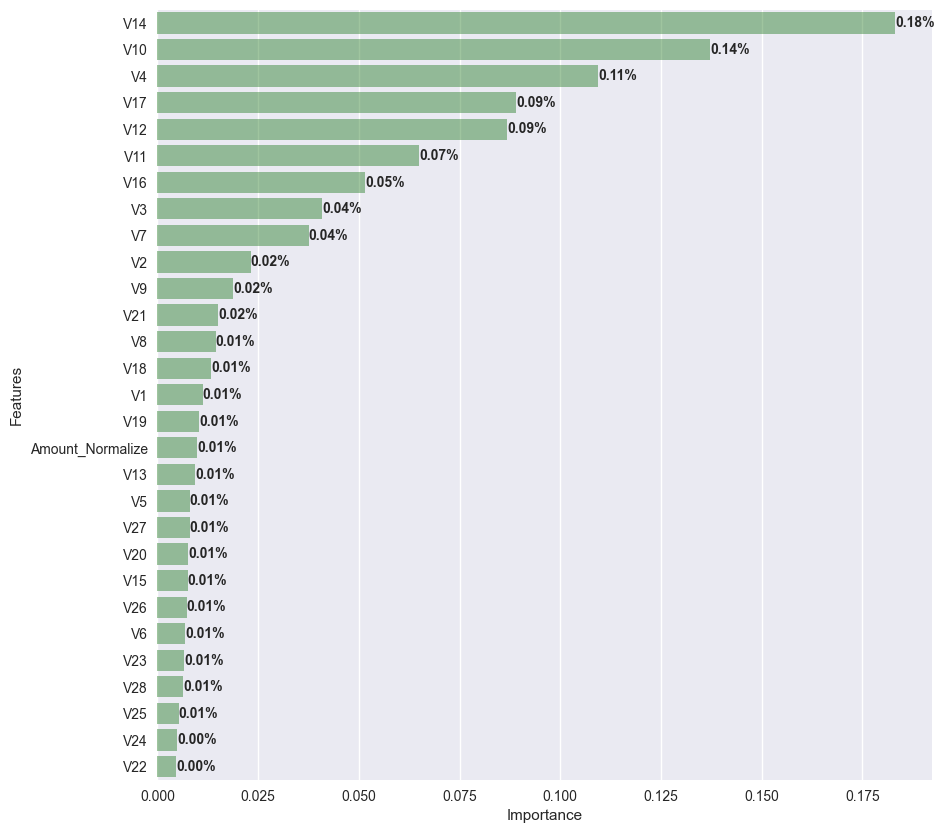

In [104]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='Importance',y='Features',data = feature_importances, color = 'g',alpha = 0.4)
sns.despine(top=True, right=True, left=False, bottom=True)

for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f%%"% rect.get_width(), weight='bold',ha = 'left', va = 'center')


plt.show()

From the plot above, the first 3 importance features include:

V14,
V10,
V14,
V17,
V12.

### Saving the model 

In [105]:
import pickle 
# Saving model to disk
pickle.dump(RT, open('model_credit_dt.pkl','wb'))

In [107]:

import pickle as pkl

In [108]:
model_credit = pkl.load(open('model_credit_dt.pkl','rb'))

In [110]:
prediction = model_credit.predict([[-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,
                                    0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0798]])

In [112]:
print(prediction)

[0]
